#### Задача 8.2

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

Сопряженное к $Bern(p)$ распределение - $Beta(\alpha, \beta)$.

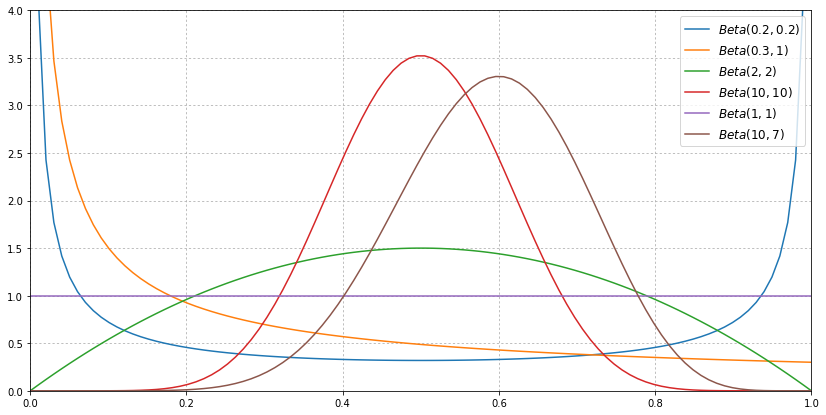

In [242]:
beta_args = ((0.2, 0.2), (0.3, 1), (2, 2), (10, 10), (1, 1), (10, 7))

plt.figure(figsize=(14, 7))
grid = np.linspace(0,1,100)
for i in range(0, len(beta_args)):
    plt.plot(grid, sps.beta.pdf(grid, beta_args[i][0], beta_args[i][1]), 
             label='$Beta({}, {})$'.format(beta_args[i][0], beta_args[i][1]))
plt.legend(fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.grid(ls=':')
plt.show()

$(0.2, 0.2)$ - монета нечестная  

$(0.3, 1)$ - монета скорее всего нечестная - перевес в сторону решки  

$(2, 2)$ - монета скорее честная  

$(10, 10)$ - монета, скорее, честна  

$(1, 1)$ - ничего неизвестно  

$(10, 7)$ - монета скорее честная, либо с небольшим перекосом в сторону герба

In [243]:
N = 50
#разные монеты
p = (0.07, 0.25, 0.5, 0.87)
#параметры априорного распр.
beta_args = ((0.2, 0.2), (10, 10), (0.3, 1), (1, 0.3))

#выборки для каждой p
samples = np.zeros((len(p), N))
for i in range(0, len(p)):
    samples[i] = sps.bernoulli.rvs(p[i], size=N)

In [244]:
def bayes_est(p_num, i, a, b):
    return ((a + np.sum(samples[p_num][:i])) / (a + b + i))

def plot_ests_deviations(p_num):
    #байесовские оценки
    bayes_ests = np.zeros((len(beta_args), N))
    for i in range(0, len(beta_args)):
        for j in range(0, N):
            bayes_ests[i][j] = bayes_est(p_num, j + 1, beta_args[i][0], beta_args[i][1])
    #омп
    mle = np.array([np.mean(samples[p_num][:i]) for i in range(1, N + 1)])
    
    plt.figure(figsize=(14, 7))
    for i in range(0, len(beta_args)):
        plt.plot(np.arange(1, N + 1), np.abs(bayes_ests[i] - p[p_num]),
                 label = '$Beta({}, {})$'.format(beta_args[i][0], beta_args[i][1]))
    plt.plot(np.arange(1, N + 1), np.abs(mle - p[p_num]), label='MLE')
    plt.legend(fontsize=11)
    plt.grid(ls=':')
    plt.xlim(0, N)
    plt.ylim(0, 0.4)
    plt.title("p = {}".format(p[p_num]), fontsize=14)
    plt.show()

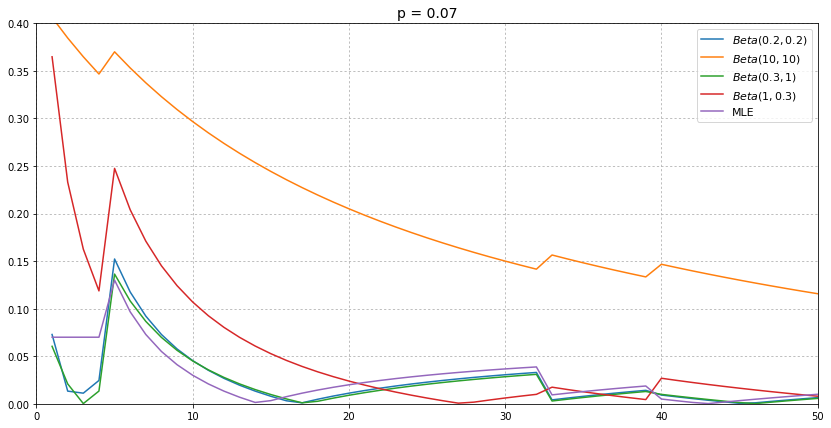

In [245]:
plot_ests_deviations(0)

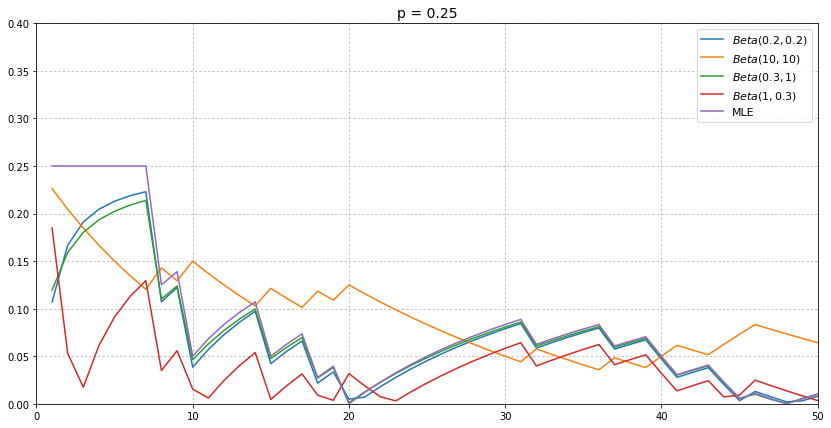

In [246]:
plot_ests_deviations(1)

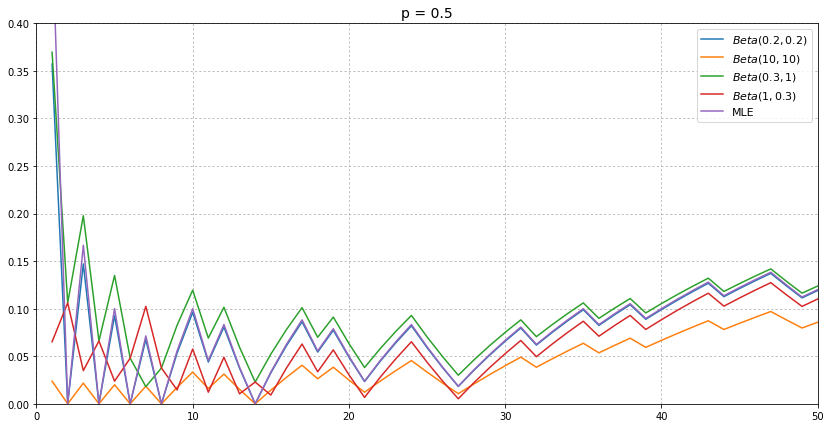

In [247]:
plot_ests_deviations(2)

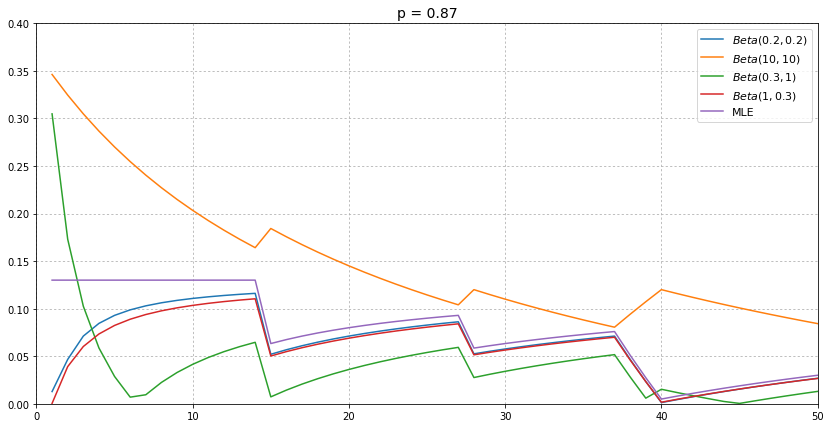

In [248]:
plot_ests_deviations(3)

При правильно подобранных параметрах априорного распределения можно получить более точные оценки искомого параметра, чем из метода омп. 

Так, разброс оценок у $Beta(0.3, 1)$ c априорным знанием ”монета, скорее всего, нечестная, перевес в сторону герба” минимальный среди всех методов для монеты с $p = 0.87$. Априорное распредление $Beta(10, 10)$ "монета скорее честна" лучше всего оценило $p$ для монеты с $p = 0.5$ и т.д.